In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import os
import json
from collections import Counter

## Read Node Data

### Repo Node

In [2]:
repo_path = 'repo_info'
repos = os.listdir(repo_path)
for file in repos:
    if not file.endswith('.json'):
        repos.remove(file)
    if file == '00_repo_names.json':
        repos.remove(file)

In [3]:
repos

['100-Days-Of-ML-Code.json',
 'AI-Expert-Roadmap.json',
 'AI-For-Beginners.json',
 'annotated_deep_learning_paper_implementations.json',
 'applied-ml.json',
 'awesome-datascience.json',
 'awesome-deep-learning-papers.json',
 'caffe.json',
 'ColossalAI.json',
 'cs-video-courses.json',
 'd2l-zh.json',
 'data-science-ipython-notebooks.json',
 'Deep-Learning-Papers-Reading-Roadmap.json',
 'DeepFaceLab.json',
 'DeepSpeech.json',
 'DeepSpeed.json',
 'faceswap.json',
 'fastai.json',
 'GFPGAN.json',
 'gradio.json',
 'handson-ml.json',
 'keras.json',
 'machine-learning-for-software-engineers.json',
 'Made-With-ML.json',
 'mediapipe.json',
 'ML-From-Scratch.json',
 'MockingBird.json',
 'netron.json',
 'opencv.json',
 'openpose.json',
 'paper-reading.json',
 'Prompt-Engineering-Guide.json',
 'pytorch-lightning.json',
 'pytorch-tutorial.json',
 'pytorch.json',
 'ray.json',
 'Real-Time-Voice-Cloning.json',
 'so-vits-svc.json',
 'spaCy.json',
 'spleeter.json',
 'stable-diffusion-webui.json',
 'stanf

### User Node

In [4]:
starer_path = 'starer_info'
starers_file = os.listdir(starer_path)

In [5]:
edges = []
users = set()
for fileName in starers_file:
    with open(starer_path + '/' + fileName, 'r') as f:
        data = json.load(f)
        print(fileName)

        for user in data:
            id = user['username']
            edges.append((id, fileName))
            if fileName not in repos:
                print(fileName)
                print(id)
            users.add(id)

100-Days-Of-ML-Code.json
AI-Expert-Roadmap.json
AI-For-Beginners.json
annotated_deep_learning_paper_implementations.json
applied-ml.json
awesome-datascience.json
awesome-deep-learning-papers.json
caffe.json
ColossalAI.json
cs-video-courses.json
d2l-zh.json
data-science-ipython-notebooks.json
Deep-Learning-Papers-Reading-Roadmap.json
DeepFaceLab.json
DeepSpeech.json
DeepSpeed.json
faceswap.json
fastai.json
GFPGAN.json
gradio.json
handson-ml.json
keras.json
machine-learning-for-software-engineers.json
Made-With-ML.json
mediapipe.json
ML-From-Scratch.json
MockingBird.json
netron.json
opencv.json
openpose.json
paper-reading.json
Prompt-Engineering-Guide.json
pytorch-lightning.json
pytorch-tutorial.json
pytorch.json
ray.json
Real-Time-Voice-Cloning.json
so-vits-svc.json
spaCy.json
spleeter.json
stable-diffusion-webui.json
stanford_alpaca.json
streamlit.json
TensorFlow-Examples.json
tensorflow.json
tesseract.js.json
transformers.json
TTS.json
ultralytics.json
yolov5.json


In [6]:
len(users)

799030

## Construct Graph

In [7]:
B = nx.Graph()

B.add_nodes_from(repos, bipartite=0)
B.add_nodes_from(users, bipartite=1)

B.add_edges_from(edges)

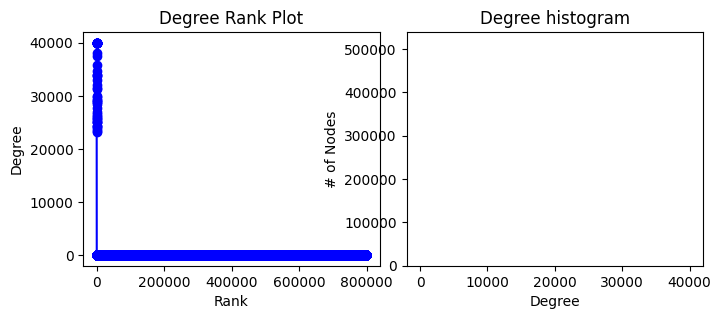

In [33]:
degree_sequence = sorted((d for n, d in B.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of the graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = B.subgraph(sorted(nx.connected_components(B), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

# fig.tight_layout()
plt.show()

In [8]:
A = bipartite.biadjacency_matrix(B, repos)

In [40]:
with open('adjacency_matrix.json', 'w+') as f:
    json.dump(A.todense().tolist(), f)

In [49]:
C = bipartite.biadjacency_matrix(B, users)

In [9]:
degX, degY = bipartite.degrees(B, repos)

In [11]:
dict(degX)

{'mychamli': 5,
 'dywxzls': 1,
 'thel3onardo': 1,
 'lsaint': 1,
 'jaime-cespedes-sisniega': 6,
 'gbarnow': 3,
 'JJJJood': 1,
 'Leo-o333': 2,
 'sovietspaceship2': 1,
 'umleric': 1,
 'elenderg': 1,
 'bhismafarhan': 2,
 'Huntersjm': 2,
 'bankly': 1,
 'Hang-CDLab': 1,
 'MauricioMarlon': 1,
 'pdtgct': 6,
 'kldtz': 1,
 'likeyuri': 1,
 'pennywisdom': 1,
 'sirguys': 1,
 'Lilysunstrider': 1,
 'SRatna': 2,
 'bominkm': 1,
 'nirved5': 1,
 'Warsongs': 1,
 'GGhuaxina': 2,
 'RochaErik': 2,
 'RC1844': 2,
 'torch2424': 1,
 'Djameleddine21': 2,
 'eWebWork': 5,
 'hyli666': 2,
 'KNeeraj038': 1,
 'SahilNagpure07': 1,
 'akachler': 1,
 'Pushkar1853': 2,
 'vyasriday': 4,
 'shsaaad': 1,
 'wickkiey': 2,
 'angular-moon': 10,
 'mictebbe': 1,
 'luanzhong': 1,
 'M1thrandirZ': 1,
 'Brkozshn': 1,
 'Lay0us1': 3,
 'pnads': 3,
 'davidjpella': 1,
 'Leorek': 1,
 'nicoprocessor': 6,
 'emillime': 1,
 'fengxiqinhu': 2,
 'IsaacBreen': 1,
 'viphak': 6,
 'liuxiong332': 8,
 'LWelsh': 1,
 'tammysgibson41': 1,
 'imzhaojiuhui': 1,


In [12]:
dict(degY)

{'100-Days-Of-ML-Code.json': 40000,
 'd2l-zh.json': 40000,
 'pytorch.json': 40000,
 'applied-ml.json': 26038,
 'DeepSpeech.json': 24389,
 'awesome-deep-learning-papers.json': 25155,
 'stanford_alpaca.json': 28882,
 'faceswap.json': 40000,
 'GFPGAN.json': 34704,
 'handson-ml.json': 25093,
 'keras.json': 40000,
 'data-science-ipython-notebooks.json': 26534,
 'MockingBird.json': 33960,
 'yolov5.json': 40000,
 'spleeter.json': 25008,
 'caffe.json': 33885,
 'transformers.json': 40000,
 'awesome-datascience.json': 23837,
 'pytorch-tutorial.json': 29185,
 'ColossalAI.json': 37997,
 'TTS.json': 29709,
 'ML-From-Scratch.json': 23217,
 'ultralytics.json': 23422,
 'gradio.json': 29257,
 'so-vits-svc.json': 24178,
 'tesseract.js.json': 33697,
 'fastai.json': 25666,
 'annotated_deep_learning_paper_implementations.json': 40000,
 'stable-diffusion-webui.json': 40000,
 'openpose.json': 29969,
 'machine-learning-for-software-engineers.json': 27770,
 'AI-Expert-Roadmap.json': 28498,
 'mediapipe.json': 2

In [64]:
Counter(dict(degX).values())  # distribution of the number of users starred the repos

Counter({1: 512852,
         2: 132445,
         8: 5871,
         4: 30509,
         3: 57388,
         5: 18831,
         6: 12128,
         7: 8224,
         9: 4394,
         23: 223,
         28: 105,
         12: 1981,
         10: 3238,
         11: 2504,
         13: 1497,
         14: 1211,
         19: 452,
         18: 540,
         16: 827,
         26: 127,
         15: 1076,
         17: 671,
         20: 352,
         34: 35,
         39: 20,
         30: 77,
         41: 13,
         27: 113,
         32: 55,
         25: 170,
         21: 306,
         22: 245,
         24: 183,
         31: 65,
         37: 27,
         33: 44,
         29: 86,
         46: 5,
         38: 24,
         36: 25,
         35: 40,
         50: 3,
         45: 5,
         40: 14,
         44: 8,
         42: 12,
         43: 4,
         48: 3,
         47: 2})